# 선형회귀(Linear Regression)

- ["What is tabular data?"](https://www.youtube.com/watch?v=ILTfP3jdVKo)
    - Tabular data의 특징을 세 부분으로 나누면?
    
- [Comparing Classification and Regression](https://youtu.be/G_0W912qmGc)
    - 지도학습(Supervised Learning)에는 두 가지 방식이 있다: 회귀(Regression) and 분류(Classification)
        - “How Much / How Many?” (회귀)
        - “Is this A or B?” (분류)
    - 회귀분석과, 분류의 타겟 특성은 무엇이 다른가?

#### 사용하는 데이터에 대한 설명.

["House Prices: Advanced Regression Techniques"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

#### 사용하는 변수는 다음과 같다.
- SalePrice: 우리가 예측해야 하는 타겟값으로 주택판매가격(달러) 이다.
- LotArea: 집과 마당의 사이즈(square feet)
- GrLivArea: 지상 생활면적(square feet)

## 주택의 판매 가격을 어떻게 예측할 수 있을까?

In [1]:
import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')
df_t = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_test.csv')

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
## 여러 특성 중 'GrLivArea', 'LotArea', 'SalePrice'를 사용

df = df[['GrLivArea', 'LotArea', 'SalePrice']]
df_t = df_t[['GrLivArea', 'LotArea']]

In [6]:
## 테이블 형테 출력, 이런 형태의 데이터를 tabular data 라고 말함
df

,GrLivArea,LotArea,SalePrice
0,1710,8450,208500
1,1262,9600,181500
2,1786,11250,223500
3,1717,9550,140000
4,2198,14260,250000
...,...,...,...
1455,1647,7917,175000
1456,2073,13175,210000
1457,2340,9042,266500
1458,1078,9717,142125


### 주택 판매 가격을 예측하려고 할 때 여러분은 다음과 같은 방법을 사용할 수 있다.

#### 1. 기존 경험을 바탕으로 예측

한마디로 대충 어림짐작하는 것. 예를 들어 밤 하늘에 달무리가 진 것을 보고 다음날 날씨가 흐릴 것을 예측하는 것과 같다.

보통 좋은 결과를 내기도 하지만 사람마다 편견이 존재하며 오류에 빠질 위험이 높다.

#### 2. 통계정보를 활용

`SalePrice`의 통계 정보를 확인해보면

In [7]:
# SalePrice의 최소, 최대, 평균, 중앙값 계산
df['SalePrice'].min(), df['SalePrice'].max(), df['SalePrice'].mean(), df['SalePrice'].median()

(34900, 755000, 180921.19589041095, 163000.0)

In [8]:
# pandas 포멧팅을 사용하면, 판다스 객체들의 결과에서 쉼표를 넣고 소숫점 아래는 생략하도록 설정할 수 있다.
# float 형식 소숫점 1자리, 쉼표 포함
pd.set_option('display.float_format', '{:,.1f}'.format)

# 기본 셋팅으로 돌아오기 위해서
# pd.set_option('display.float_format', None) 

In [9]:
## SalePrice 통계 정보를 요약해서 확인할 수도 있다.
df['SalePrice'].describe()

count     1,460.0
mean    180,921.2
std      79,442.5
min      34,900.0
25%     129,975.0
50%     163,000.0
75%     214,000.0
max     755,000.0
Name: SalePrice, dtype: float64

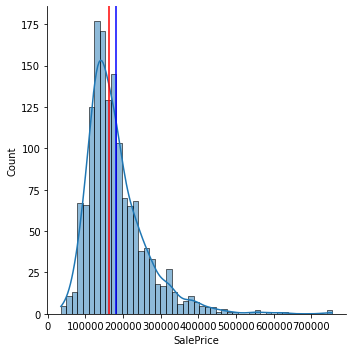

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## SalePrice의 확률밀도함수
sns.displot(df['SalePrice'], kde=True)

## 평균과, 중간값으로 수직선
plt.axvline(df['SalePrice'].mean(), color='blue')
plt.axvline(df['SalePrice'].median(), color='red');

만일 가격을 처음으로 예측한다고 할 때, 가장 간단하고 직관적인 방법으로 평균이나 중간값을 이용해 보는 것도 좋은 선택일 것이다.

#### 기준모델(Baseline Model)
이렇게 예측 모델을 구체적으로 만들기 전에 가장 간단하면서도 직관적이면서 최소한의 성능을 나타내는 기준이 되는 모델을 기준모델 이라고 한다.
여기서는 평균값을 기준으로 사용해서 평균기준모델이라고 말할 수 있음.

참고로 문제별로 기준모델은 보통 다음과 같이 설정한다.
- 분류문제: 타겟의 최빈 클래스
- 회귀문제: 타겟의 평균값
- 시계열회귀문제: 이전 타임스탬프의 값

In [12]:
## predict: 정한 기준모델인 평균으로 예측
predict = df['SalePrice'].mean()

In [13]:
## 평균값으로 예측할 때 샘플 별 평균값과의 차이(error)를 저장
errors = predict - df['SalePrice']

In [14]:
errors

0      -27,578.8
1         -578.8
2      -42,578.8
3       40,921.2
4      -69,078.8
          ...   
1455     5,921.2
1456   -29,078.8
1457   -85,578.8
1458    38,796.2
1459    33,421.2
Name: SalePrice, Length: 1460, dtype: float64

In [15]:
## mean_absolute_error(MAE), error에 절대값을 취한 후 평균을 계산.
mean_absolute_error = errors.abs().mean()

Mean Absolute Error(MAE, 평균절대오차) 는 예측 error 의 절대값 평균을 나타낸다.

$$Error = (price - guess)$$

\begin{align}mae = (\frac{1}{n})\sum_{i=1}^{n}\left | price_{i} - guess_{i} \right |\end{align}

기준모델을 그려보면

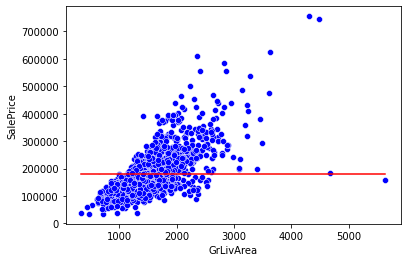

In [16]:
x = df['GrLivArea']
y = df['SalePrice']

predict = df['SalePrice'].mean()
errors = predict - df['SalePrice']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [17]:
print(f'예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있다.')

예측한 주택 가격이 $180,921이며 절대평균에러가 $57,435임을 확인할 수 있다.


평균 예측은 에러가 상당히 크다는 것을 알 수 있음.

혹시 주택 가격이 전체공간크기(LotArea)와 같은 다른 특성과 어떤 상관관계(dependent)가 있을까? 이 관계를 시각적으로 살펴보면.

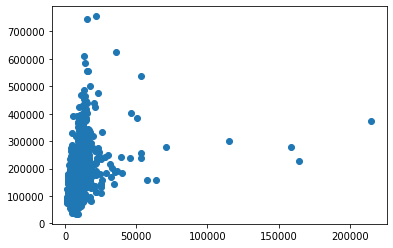

In [18]:
## matplotlib scatter plot: LotArea, SalePrice
plt.scatter(df['LotArea'], df['SalePrice']);

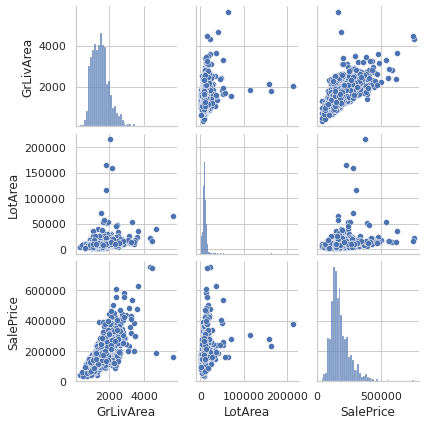

In [19]:
sns.set(style='whitegrid', context='notebook')
cols = ['GrLivArea', 'LotArea','SalePrice']
sns.pairplot(df[cols], height=2);

#### 3. 예측모델(Predictive Model) 활용

scatterplot에 가장 잘 맞는(best fit) 직선을 그려주면 그것이 회귀 예측모델이 된다.

- [scatterplot](https://www.plotly.express/plotly_express/#plotly_express.scatter)

그럼 회귀직선은 어떻게 만들 수 있을까? 회귀분석에서 중요한 개념은 예측값과 잔차(residual) 이다.
예측값은 만들어진 모델이 추정하는 값이고, 잔차는 예측값과 관측값 차이 이다.(오차(error)는 모집단에서의 예측값과 관측값 차이를 말한다.)

회귀선은 잔차 제곱들의 합인 RSS(residual sum of squares)를 최소화 하는 직선이다. RSS는 SSE(Sum of Square Error)라고도 말하며 이 값이 회귀모델의 비용함수(Cost function)가 된다. 머신러닝에서는 이렇게 비용함수를 최소화 하는 모델을 찾는 과정을 학습이라고 한다.

${\displaystyle \operatorname {RSS} =\sum _{i=1}^{n}(\varepsilon _{i})^{2}=\sum _{i=1}^{n}(y_{i}-f(x_{i}))^{2}=\sum _{i=1}^{n}(y_{i}-(\alpha x_{i} + \beta))^{2}}$

여기서 계수 $\alpha$ 와 $\beta$ 는 RSS를 최소화 하는 값으로 모델 학습을 통해서 얻어지는 값이다.

이렇게 잔차제곱합을 최소화하는 방법을 최소제곱회귀 혹은 Ordinary least squares(OLS)라고 부른다.

OLS는 계수 계산을 위해 다음 공식을 사용한다.(유도과정을 알고 싶으면 참고자료를 확인)

$\beta =\displaystyle {\bar {y}}-\alpha{\bar {x}}$,

$\alpha ={\frac {S_{xy}}{S_{xx}}}$

${\displaystyle S_{xy}=\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}$,   ${\displaystyle S_{xx}=\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}$

최소제곱법으로 선형 회귀계수를 쉽게 구할 수 있다.

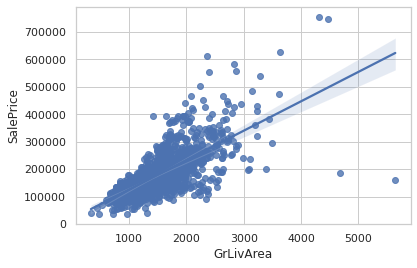

In [20]:
## Seaborn regplot으로 그리면, 
sns.regplot(x=df['GrLivArea'], y=df['SalePrice']);

In [21]:
## GrLivArea > 3500 & GrLivArea < 4500 사이의 데이터를 보면
df[(df['GrLivArea'] > 3500) & (df['GrLivArea'] < 4500)]

,GrLivArea,LotArea,SalePrice
185,3608,22950,475000
691,4316,21535,755000
1169,3627,35760,625000
1182,4476,15623,745000


선형회귀는 주어져 있지 않은 점의 함수값을 보간(**interpolate**) 하여 예측하는데 도움을 준다.

예를 들어 GrLivArea 3626 ~ 4315 sqft 사이에 주택의 가격 정보가 없다. 이때 선형회귀 모델을 사용해 4000 sqft 주택 가격을 어림잡아 예측해 볼 수 있다.

물론 선형회귀모델은 기존 데이터의 범위를 넘어서는 값을 예측하기 위한 외삽(**extrapolate**)도 제공해준다.

지금 다루는 데이터에는 6000 sqft 이상되는 주택의 거래 정보가 없다.

In [22]:
df[(df['GrLivArea'] > 6000)].sort_values('GrLivArea')

,GrLivArea,LotArea,SalePrice


이런 경우는 어떻게 예측해야 할까?

선형회귀 직선은 독립변수(independent variable, x)와 종속변수(dependent variable, y) 간의 관계를 요약해 준다.

- **종속변수는 반응(Response)변수, 레이블(Label), 타겟(Target)등으로 불립니다.**
- **독립변수는 예측(Predictor)변수, 설명(Explanatory), 특성(feature) 등으로 불린다.**

## 그럼 scikit-learn을 사용해서 선형회귀모델을 만들어 보자

scikit-learn은 머신러닝 모델을 만드는데 가장 많이 사용하는 라이브러리로 이번 섹션에서 계속 활용된다.

#### scikit-Learn을 활용해 모델을 만들고 데이터를 분석하기 위해서는 다음과 같은 데이터 구조를 사용해야 한다:

<img src="https://www.researchgate.net/publication/301946040/figure/fig1/AS:362519232303116@1463442728351/Data-representation-in-scikit-learn.png" alt="Data representation in scikit-learn"/>

- 특성 데이터와 타겟 데이터를 나누어 준다.

- 특성행렬은 주로 `X` 로 표현하고 보통 2-차원 행렬이다(`[n_samples, n_features]`). 주로 NumPy 행령이나 Pandas 데이터프레임으로 표현한다.

- 타겟배열은 주로 y로 표현하고 보통 1타원 형태(`n_samples`) 입니다. 주로 Numpy 배열이나 Pandas Series로 표현한다.

#### scikit-learn에는 수많은 머신러닝 모델이 구현되어 있는데 모두 유사한 프로세스를 통해서 사용할 수 있다. 

- 우선 풀어야 하는 문제를 풀기에 적합한 모델을 선택하여 클래스를 찾아본 후 관련 속성이나 하이퍼파라미터를 확인해 본다.
- 문제에 따라서 약간 차이가 있겠지만 위에서 살펴본 것과 같이 데이터를 준비한다.
- `fit()` 메소드를 사용하여 모델을 학습한다.
- 'predict()' 메소드를 사용하여 새로운 데이터를 예측한다.

- [Basics of the API](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)

## Simple Linear Regression (단순 선형 회귀)

위에 언급한 방법에 따라서 머신러닝모델을 만들어 보자.

- [Scikit-Learn LinearRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [23]:
## Scikit-Learn 라이브러리에서 사용할 예측모델 클래스를 Import
from sklearn.linear_model import LinearRegression

In [24]:
## 예측모델 인스턴스를 생성
model = LinearRegression()

In [25]:
## X 특성들의 테이블과, y 타겟 벡터를 생성
feature = ['GrLivArea']
target = ['SalePrice']
X_train = df[feature]
y_train = df[target]

In [26]:
## 모델을 학습(fit)
model.fit(X_train, y_train)

LinearRegression()

In [27]:
## 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측
X_test = [[4000]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} sqft GrLivArea를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

4000 sqft GrLivArea를 가지는 주택의 예상 가격은 $447090 입니다.


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
## 전체 테스트 데이터를 모델을 통해 예측
X_test = [[x] for x in df_t['GrLivArea']]
y_pred = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
y_pred

array([[114557.82748987],
       [160945.27292207],
       [193084.38061182],
       ...,
       [149696.58523066],
       [122485.47405334],
       [232829.74378814]])

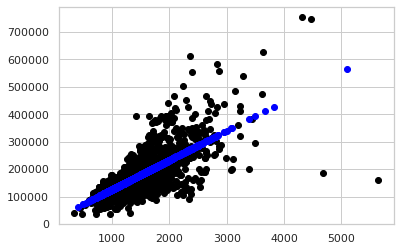

In [30]:
## train 데이터에 대한 그래프
plt.scatter(X_train, y_train, color='black', linewidth=1)

## test 데이터에 대한 예측을 파란색 점으로 표시
plt.scatter(X_test, y_pred, color='blue', linewidth=1);

데이터를 입력하고 어떤 룰에 따라 답을 구해내는 일반적인 프로그래밍과 달리 머신러닝은 데이터와 답을 통해 룰을 찾아내는 방법이라고 볼 수 있다.
— [a new programming paradigm](https://livebook.manning.com/book/deep-learning-with-python/chapter-1/)

## 선형회귀모델의 계수(Coefficients)

모델이 주택의 크기와 가격 사이에서 어떤 관계를 학습했을까?

이 질문에 대한 답을 하기 위해 `LinearRegression` 객체의 `coef_`, `intercept_` 속성을 확인해 보자.
- [sckit-learn.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [31]:
## 계수(coefficient)
model.coef_

array([[107.13035897]])

In [32]:
## 절편(intercept)
model.intercept_

array([18569.02585649])

#### 예측함수를 만들어 새로운 데이터를 반복해서 예측하고 coefficient의 영향을 설명해 보자:

In [33]:
def explain_prediction(sqft):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택 가격 예측: ${int(y_pred[0])} (1 sqft당 추가금: ${int(model.coef_[0])})"

    return pred

In [34]:
## square_feet = 4000 인 테스트 데이터로 예측
print(explain_prediction(4000))

4000 sqft 주택 가격 예측: $447090 (1 sqft당 추가금: $107)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### ipywidgets를 사용해서 sqft를 바꾸어 가며 예측해 보자.

In [36]:
from ipywidgets import interact

# 데코레이터 interact를 추가.
@interact
def explain_prediction(sqft=(500,10000)):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택 가격 예측: ${int(y_pred[0])} (1 sqft당 추가금: ${int(model.coef_[0])})"

    return pred

interactive(children=(IntSlider(value=5250, description='sqft', max=10000, min=500), Output()), _dom_classes=(…

## 참고자료

#### 기준모델
- [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)

#### Scikit-Learn
- [Python Data Science Handbook, Chapter 5.2: Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)
- [2.4.2.2. Supervised Learning](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/text_analytics/general_concepts.html#supervised-learning-model-fit-x-y)
- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [sklearn.metrics.mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

#### 읽을거리
- [Art of Choosing Metrics in Supervised Models](https://towardsdatascience.com/art-of-choosing-metrics-in-supervised-models-part-1-f960ae46902e)
- [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)

#### 최소제곱법
- [수학산책-최소제곱법](https://terms.naver.com/entry.nhn?cid=58944&docId=3569970&categoryId=58970)

#### (참고) 더 세련된 시각화툴: Plotly
- [Plotly Express](https://plot.ly/python/plotly-express/)
- [plotly_express.scatter](https://www.plotly.express/plotly_express/#plotly_express.scatter)

#### ipywidgets interact
- [Using Interact](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#Using-Interact)


# Exercise

# Linear Regression

데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터이다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


In [37]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

In [38]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.0",3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5,-122.3,1340,5650
1,6414100192,20141209T000000,"538,000.0",3,2.2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7,-122.3,1690,7639
2,5631500400,20150225T000000,"180,000.0",2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7,-122.2,2720,8062
3,2487200875,20141209T000000,"604,000.0",4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5,-122.4,1360,5000
4,1954400510,20150218T000000,"510,000.0",3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6,-122.0,1800,7503


## 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화하라.

In [39]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,-0.0,0.0,0.0,-0.0,-0.1,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.1
price,-0.0,1.0,0.3,0.5,0.7,0.1,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.1,0.1,-0.1,0.3,0.0,0.6,0.1
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.2,-0.0,0.1,0.0,0.4,0.5,0.3,0.2,0.0,-0.2,-0.0,0.1,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.1,0.5,0.1,0.2,-0.1,0.7,0.7,0.3,0.5,0.1,-0.2,0.0,0.2,0.6,0.1
sqft_living,-0.0,0.7,0.6,0.8,1.0,0.2,0.4,0.1,0.3,-0.1,0.8,0.9,0.4,0.3,0.1,-0.2,0.1,0.2,0.8,0.2
sqft_lot,-0.1,0.1,0.0,0.1,0.2,1.0,-0.0,0.0,0.1,-0.0,0.1,0.2,0.0,0.1,0.0,-0.1,-0.1,0.2,0.1,0.7
floors,0.0,0.3,0.2,0.5,0.4,-0.0,1.0,0.0,0.0,-0.3,0.5,0.5,-0.2,0.5,0.0,-0.1,0.0,0.1,0.3,-0.0
waterfront,-0.0,0.3,-0.0,0.1,0.1,0.0,0.0,1.0,0.4,0.0,0.1,0.1,0.1,-0.0,0.1,0.0,-0.0,-0.0,0.1,0.0
view,0.0,0.4,0.1,0.2,0.3,0.1,0.0,0.4,1.0,0.0,0.3,0.2,0.3,-0.1,0.1,0.1,0.0,-0.1,0.3,0.1
condition,-0.0,0.0,0.0,-0.1,-0.1,-0.0,-0.3,0.0,0.0,1.0,-0.1,-0.2,0.2,-0.4,-0.1,0.0,-0.0,-0.1,-0.1,-0.0


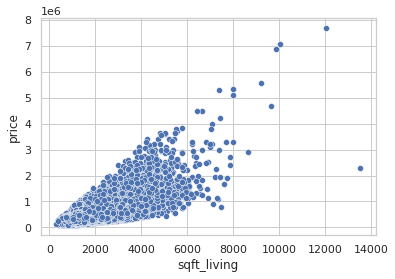

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

sns.scatterplot(df.sqft_living, df.price, data = df);

## 2) sqft_living 와 price의 scatter plot을 그리고 기준모델을 시각화하라.

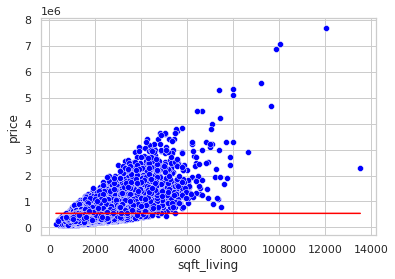

In [41]:
x = df['sqft_living']
y = df['price']

predict = df['price'].mean()
errors = predict - df['price']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [42]:
print(f'예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있다.')

예측한 주택 가격이 $540,088이며 절대평균에러가 $233,942임을 확인할 수 있다.


In [43]:
np.round(predict,0)

540088.0

## 3) Scikit-Learn 라이브러리를 사용해 특성 sqft_living에 대한 선형회귀모델을 만들어보라.

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
X_test = [[4000]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} sqft GrLivArea를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

4000 sqft GrLivArea를 가지는 주택의 예상 가격은 $1078913 입니다.


In [47]:
np.round(y_pred,0)

array([[1078914.]])

In [48]:
X_test = [[15000]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} sqft GrLivArea를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

15000 sqft GrLivArea를 가지는 주택의 예상 가격은 $4165772 입니다.


In [49]:
np.round(y_pred,0)

array([[4165773.]])

## 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해보라.

In [50]:
# sqft_living 단위가 1 증가할 때 주택 가격은 281$ 상승한다.

np.round(model.coef_,0)

array([[281.]])

## 5) bathrooms 특성을 사용하여 모델을 만들어보고 비교하라.

In [52]:
feature = ['bathrooms']
target = ['price']
X_train = df[feature]
y_train = df[target]
model.fit(X_train, y_train)

np.round(model.coef_,0)

# bathrooms 단위가 1 증가할 때 주택 가격은 250347$ 상승한다.

array([[250327.]])

## 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 논해보라.

단순선형회귀분석이란 단일 독립변수에 대한 종속변수의 추이를 분석하는 것이다.

단순선형회귀모델은 이런 원리를 사용하여 주어진 feature와 target의 관계를 학습하고 정확한 수치(기울기, 절편)로 나타내는 것을 말한다.

target에 영향을 끼치는 feature가 무엇일지 잘 선택하는 것이 중요하다.

객관적인 수치로 명확한 표현이 가능한 양적변수는 회귀분석에 유용하게 사용된다.

질적변수도 더미 코딩을 통해 수치로 변환하거나, 전문가들이나 기존 연구에 의해 완성된 신뢰도 높은 방법으로 연속적 수치로 변환할 수 있다면 얼마든지 사용 가능하다.

시각화를 통해 상관관계를 눈으로 파악하거나, 공분산 혹은 상관계수를 확인해 보거나, 좋은 특성을 분별하는 작업까지 코딩으로 처리하여 정확도를 높이면 좋은 특성을 선택할 수 있다.

<br>

## 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 본인의 언어로 설명해 보라

최소자승법(Ordinary Least Squares)은 잔차제곱합(RSS: Residual Sum of Squares)을 최소화하는 벡터를 구하는 방법이다.

분포되어 있는 데이터의 추세선을 그리고자 할 때 주로 사용된다.

추세선과 데이터 벡터의 오차는 다양한 형태로 표현될 수 있지만 가장 보편적이고 쉽게 이해할 수 있는 지표는 잔차 제곱합이다.

우리가 오늘 배웠던 단순선형회귀로만 제한하여 생각해 보자. 그리고 어떤 데이터값의 벡터가  (xi,yi)  이고, 단순회귀선의 식이  yi^=axi+b  라고 가정해보자.
이 때,  x1 에 따른  y1^ 과 실제  y1 의 값은 동일하지 않다.

모든 데이터를 지나도록 일차방정식 선을 그릴 수 있으면 좋겠지만,  y1^≠y1 인 것 처럼, 단순선형회귀분석으로는 불가능 한 일이다.

따라서  (xi,yi) 에서  y^=ax+b  까지의 거리, 즉 오차를 최소화 할 수 있는 방법을 사용하여 데이터의 분포를 가장 잘 반영하는 직선(회귀선)을 그리는 것으로 최선의 타협을 한다.

여기서 해당 오차를 최소화 하는 방법 중 하나가 잔차제곱합을 최소화하는 최소자승법이다.